# Naive Bayes


Objetivo: El aprendizaje máquina se puede usar para clasificación y regresión. Se comprenderá el concepto y funcionamiento de un clasificador, así como su evaluación y como implementarlo a un dataset. 

- Referencia y documentación: https://scikit-learn.org/stable/modules/naive_bayes.html

Esta técnica está basada en el teorema de Bayes. Se utiliza para clasificar vectores de características. Se asume que las características son independientes dada la clase, es por esto la palabra 'naive'. Este clasificador trabaja bien incluso si las características son dependientes, además de que no sufre de sobreajuste.

_Nota: Se usará el mismo dataset con diferentes clasificadores para familiarizarse con los datos y poder hacer comparación (ventajas/desventajas) clara entre estos._

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$

Usando la regla de al cadena

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Dado que $P(x_1, \ldots, x_n)$ es constante dada la entrada, se puede usar la siguiente regla de clasificación:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$




$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

Se encuentra la clase $y$ con máxima probabilidad.



- Bernoulli Naive Bayes implementa la regla de decisión

$$P(x_i | y) = P(i|y)x_i + (1-P(i|y))(1-x_i)$$

Se asume que las características son binarias, si no es el caso el parámetro 'binarize' debe ser indicado

- Complement Naive Bayes sirve para datos no balanceados y ha mostrado superar a Multinomial Naive Bayes para clasificación de texto. Este algoritmo calcula pesos.

- Gaussian Naive Bayes implementa el algoritmo Gaussian Naive Bayes para la clasificación. Se asume que la probabilidad de las características es gaussiana:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y})$$

Los parámetros $\sigma_y$ y $\mu_y$  de los valores $x$ están asociados con la clase $y$

In [1]:
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Análisis exploratorio
### Etiquetas de clase a valor numérico

- Diagnosis (M = malignant, B = benign) 

In [2]:
%matplotlib inline

df = pd.read_csv("data-breast.csv",index_col=0)

df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [3]:
df.iloc[:,1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df = df.replace({'B':0, 'M':1})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


## Coeficientes de correlación
- Para selección de características se puede conocer que variables estan mas relacionadas con la variable de clase con la matriz de correlación
- El resultado del método 'corr()' de pandas se puede plotear con 'heatmap'

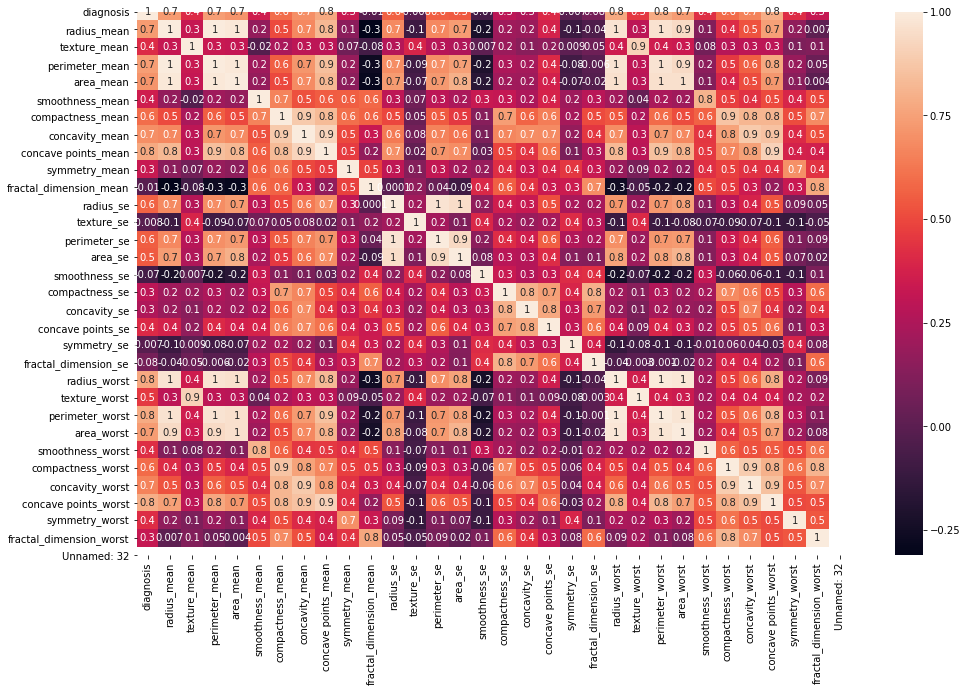

In [5]:
import numpy as np
corr = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt='.1g')

## Boxplots de variables por clase
- 'sns.boxplot' recibe el nombre de la variable a plotear

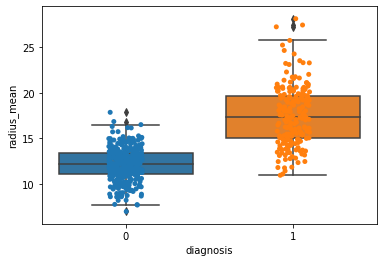

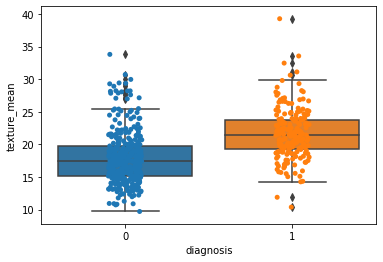

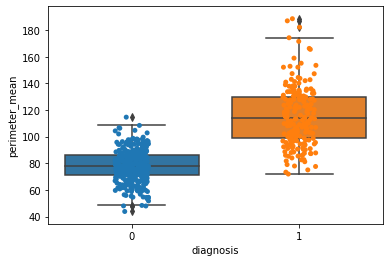

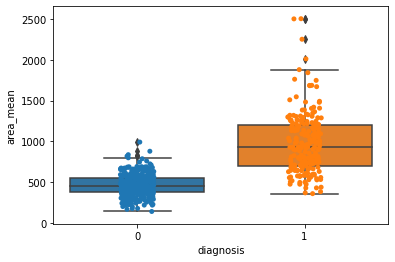

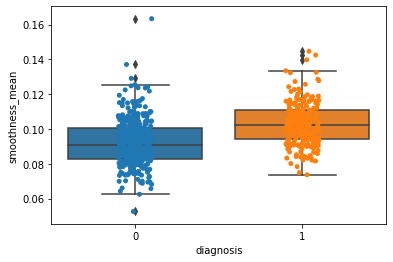

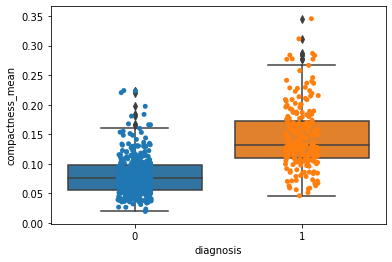

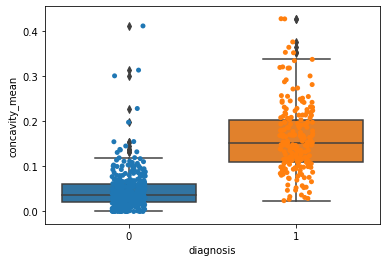

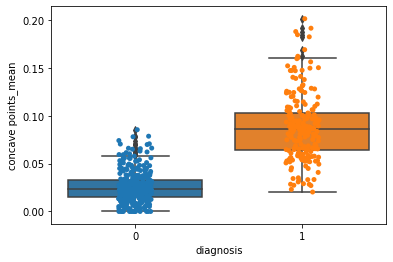

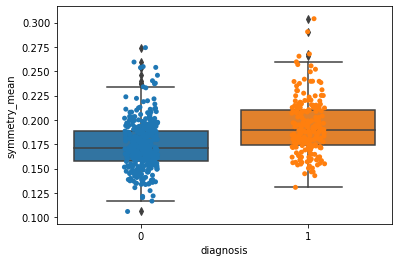

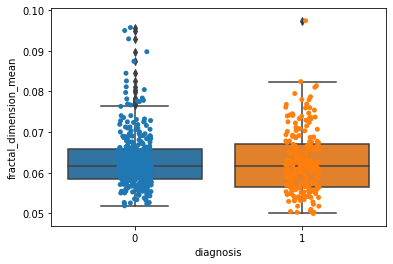

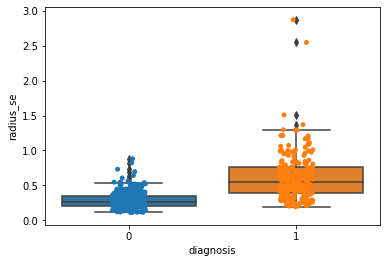

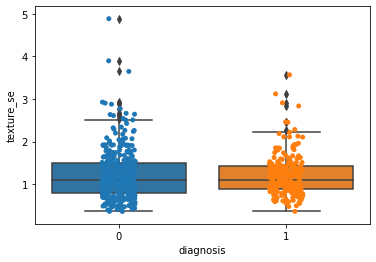

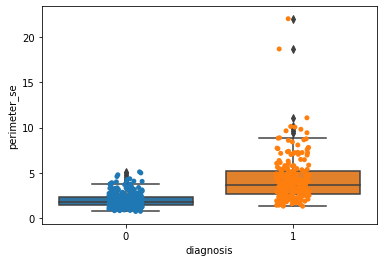

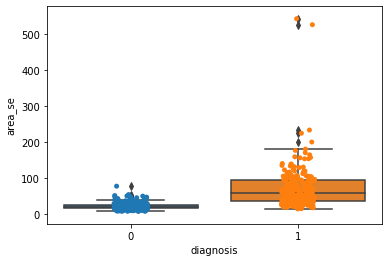

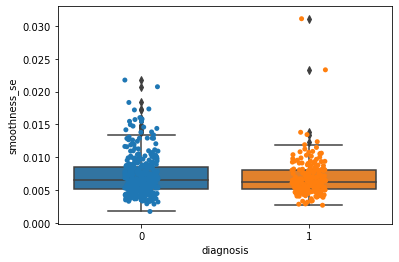

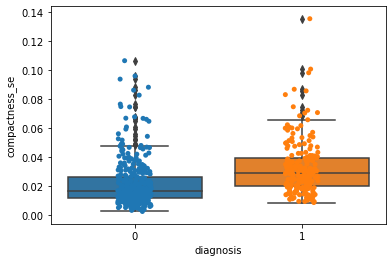

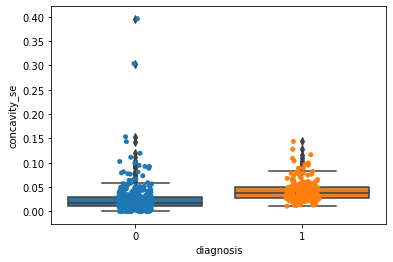

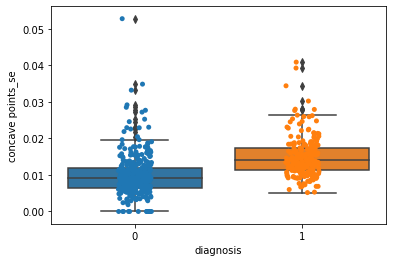

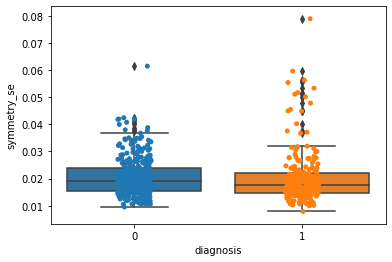

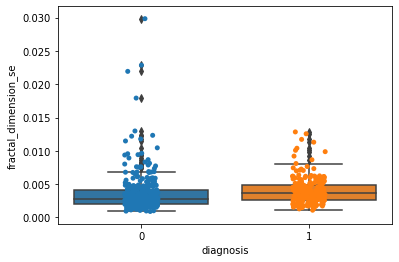

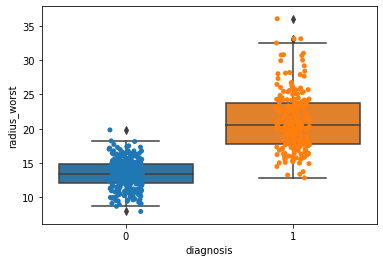

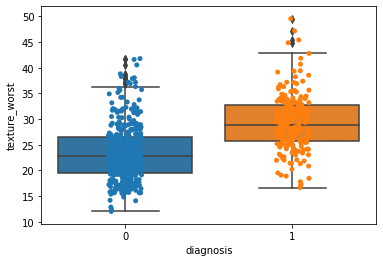

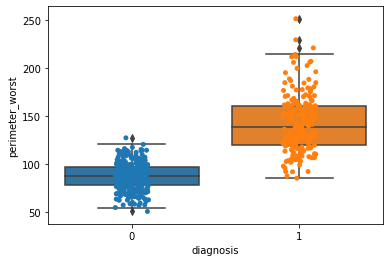

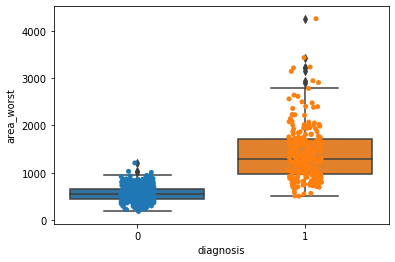

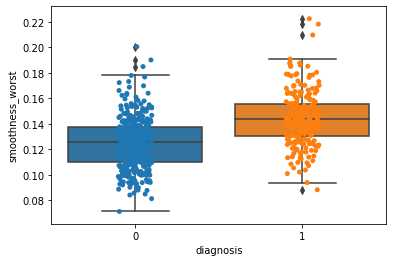

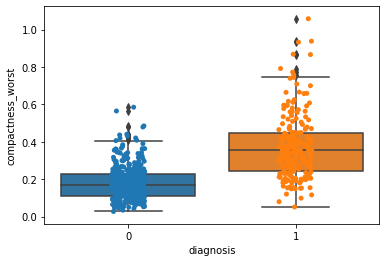

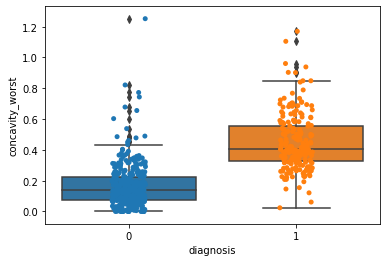

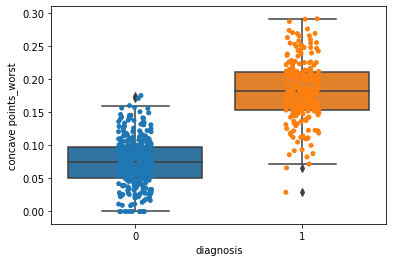

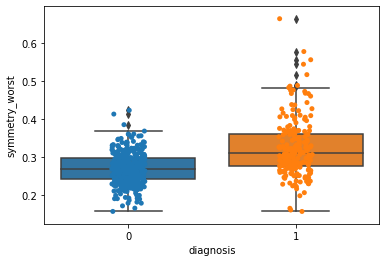

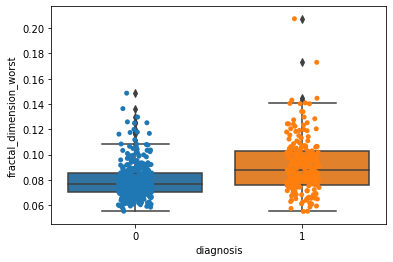

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)
l=list(df.columns)
l[0:len(l)-1]
for i in range(1,len(l)-1):
    sns.boxplot(x='diagnosis' ,y=l[i], data=df)
    sns.stripplot(x='diagnosis' ,y=l[i], data=df)
    plt.figure()
    

## Visualizar variables en plano 'x y'
- Con 'pairplot' se pueden visualizar las características de una forma clara y rápida. Se recibe como argumento la lista de variables a plotear

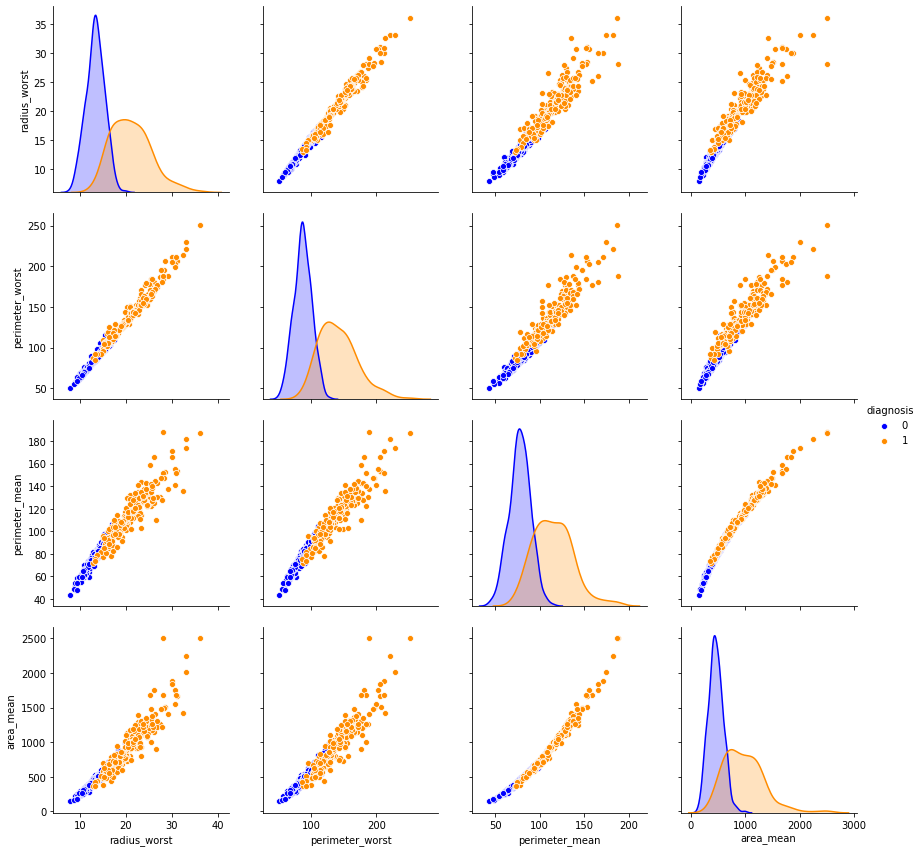

In [7]:
sns.pairplot(df, vars=["radius_worst", "perimeter_worst", "perimeter_mean", "area_mean"],
             palette=sns.color_palette(['blue', 'darkorange']), hue='diagnosis', height=3)
plt.show()

## Conteo de clases

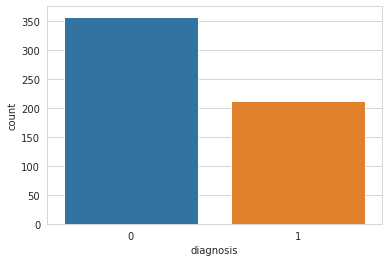

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

## Preparar datos para entrenamiento

In [9]:
from sklearn.model_selection import train_test_split 
  
X = df.drop('diagnosis',axis=1)
X = X.drop('Unnamed: 32',axis=1)
y = df['diagnosis']
# dividir datos 
train, test, train_labels, test_labels = train_test_split(X, y, 
                                       test_size = 0.33, random_state = 3) 

In [10]:
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
917896,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,15.11,25.63,99.43,701.9,0.14250,0.2566,0.1935,0.12840,0.2849,0.09031
8611792,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.33,32.72,141.30,1298.0,0.13920,0.2817,0.2432,0.18410,0.2311,0.09203
864877,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.7356,0.20340,0.3274,0.12520
904689,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
89382602,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,0.06140,...,14.19,16.40,92.04,618.8,0.11940,0.2208,0.1769,0.08411,0.2564,0.08253


# Evaluación de modelos

- Se obtienen las predicciones, informe de clasificación y matriz de confusión.
- Se crea lista para guardar evaluaciones

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [12]:
ev = []

## BernoulliNB
- Se ajusta el parámetro 'binarize'

In [13]:
from sklearn.naive_bayes import BernoulliNB

In [14]:

acc = []


for b in range(1,10):
    
    bnb = BernoulliNB(binarize=0.1*b)
    bnb.fit(train,train_labels)
    pred = bnb.predict(test)
    acc.append(accuracy_score(test_labels, pred))


Text(0, 0.5, 'Accuracy')

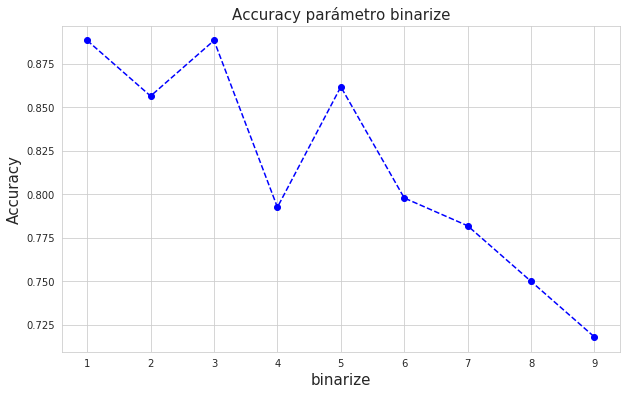

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color='blue', linestyle='--', marker='o')
plt.title('Accuracy parámetro binarize', fontsize=15)
plt.xlabel('binarize',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)

- Con 'binarize' con valor de 0.3 se obtiene el mejor resultado

In [16]:
bnb = BernoulliNB(binarize=0.3)
bnb.fit(train, train_labels)
ev.append(bnb.score(test, test_labels))
bnb.score(test, test_labels)

0.8882978723404256

In [17]:
from sklearn.metrics import classification_report

In [18]:
predictions = bnb.predict(test) 
print("Predicciones:\n")
print(predictions) 
print("\nReporte de clasificación:\n")
print(classification_report(predictions,test_labels))

Predicciones:

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 0]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       129
           1       0.78      0.90      0.83        59

    accuracy                           0.89       188
   macro avg       0.86      0.89      0.88       188
weighted avg       0.90      0.89      0.89       188



In [19]:
print("Confusion matrix")
conf_mat=confusion_matrix(predictions,test_labels)
print(conf_mat)

Confusion matrix
[[114  15]
 [  6  53]]


## ComplementNB

In [20]:
from sklearn.naive_bayes import ComplementNB

In [21]:
cnb = ComplementNB()
cnb.fit(train, train_labels)
ev.append(cnb.score(test, test_labels))
cnb.score(test, test_labels)

0.898936170212766

In [22]:
predictions = cnb.predict(test) 
print("Predicciones:\n")
print(predictions) 
print("\nReporte de clasificación:\n")
print(classification_report(predictions,test_labels))

Predicciones:

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 0]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       129
           1       0.79      0.92      0.85        59

    accuracy                           0.90       188
   macro avg       0.88      0.90      0.89       188
weighted avg       0.91      0.90      0.90       188



In [23]:
print("Confusion matrix")
conf_mat=confusion_matrix(predictions,test_labels)
print(conf_mat)

Confusion matrix
[[115  14]
 [  5  54]]


## GaussianNB

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()  

gnb.fit(train, train_labels) 
ev.append(gnb.score(test, test_labels))
gnb.score(test, test_labels)


0.9574468085106383

In [25]:
predictions = gnb.predict(test) 
print("Predicciones:\n")
print(predictions) 
print("\nReporte de clasificación:\n")
print(classification_report(predictions,test_labels))

Predicciones:

[0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 0]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       122
           1       0.93      0.95      0.94        66

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



In [26]:
print("Confusion matrix")
conf_mat=confusion_matrix(predictions,test_labels)
print(conf_mat)

Confusion matrix
[[117   5]
 [  3  63]]


In [27]:
df = pd.DataFrame({'clasificador':['BernoulliNB','ComplementNB', 'GaussianNB'], 'score':ev})
df

,clasificador,score
0,BernoulliNB,0.888298
1,ComplementNB,0.898936
2,GaussianNB,0.957447


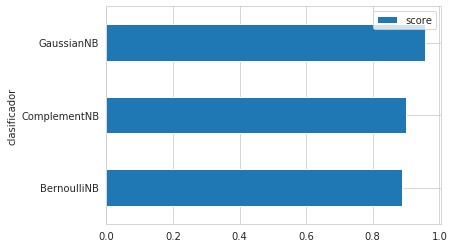

In [28]:
ax = df.plot.barh(x='clasificador', y='score')

- Usar el clasificador en otro dataset